# 誤差理論與測量平差課程輔助程式
## 作者：黃明哲博士 (geodesy.cnu@gmail.com)
#### ch01_02_azdis_pos.ipynb
#### 平面點基本定位方法 (方位角+距離)範例
#### 極坐標法 (光線法)

<img src="https://drive.google.com/uc?id=1N7-orgQt4dj60HAO5HEkAAovomr4FE63">

程式操作方法：
開啟本記事簿，輸入觀測點座標、原方向參考座標，<br />
點位號碼、觀測的距離、從參考原方向的方向角

即可獲得各點位的座標
<img src="
https://drive.google.com/uc?id=1B2vEPt0Yg52Y9xwHJ01CRU4053684cr_">

In [2]:
%matplotlib inline

from pygeodadj.adj_utils import azdis
from pygeodadj.adj_utils import plot_azdis
from pygeodadj.adj_utils import azdis_compute
from pygeodadj.adj_utils import plot_azdis_pos
from pygeodadj.adj_utils import dms2d

觀測點：	170559.450 2535801.064
參考點：	170727.663 5432.100
距離:	 2530368.970m
參考方位： 179度 59分46.29秒


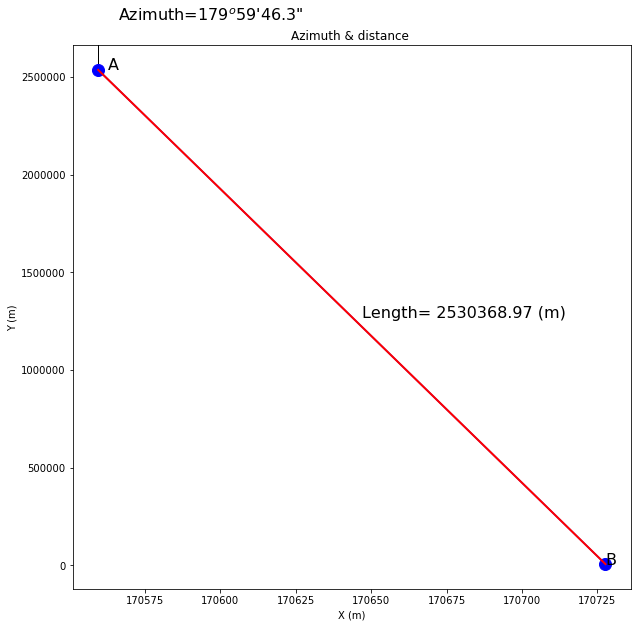

In [3]:
# 測試範例

data_dir='./'

# 觀測點 (CNU DG:02) TWD97
xa=170559.45
ya=2535801.064

# 參考原方向 (CNU: GD52)
xb=170727.663
yb=5432.100;

# 呼叫計算方位角距離程式
deg,mm,sec,dis=azdis(xa,ya,xb,yb)
az0=dms2d(deg,mm,sec)

#顯示計算結果 
print("觀測點：\t%.3f %.3f"%(xa,ya))
print("參考點：\t%.3f %.3f"%(xb,yb))
print("距離:\t %.3fm"%(dis))
print("參考方位： %3.3d度 %2.2d分%.2f秒"%(deg,mm,sec))

csv_file=data_dir+'azdis_pos_out.txt'
file = open(csv_file,'w') 
file.write("極坐標法計算結果\n")
file.write("\n觀測點：\t%.3f %.3f"%(xa,ya))
file.write("\n參考點：\t%.3f %.3f"%(xb,yb))
file.write("\n距離:\t %.3fm"%(dis))
file.write("\n參考方位： %3.3d度 %2.2d分%.2f秒\n"%(deg,mm,sec))
file.close() 

plot_azdis(xa,ya,xb,yb,deg,mm,sec,dis)

## 輸入資料檔案範例
###輸入資料檔：azdis_pos.txt
 pt_1, 10,23,10,1550 <br />
 pt_2, 32,45,30,1053 <br />
 pt_3, 348,45,30,1753 <br />


In [0]:
# Google Drive特殊需要載入的程式庫

from google.colab import drive
drive.mount('/content/drive/')
data_dir='drive/My Drive/Colab Notebooks/Courses/adjustment/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import pandas as pd

data_dir='./'

df=pd.read_csv(data_dir+'azdis_pos.txt',header=None,skiprows=2,
               names=['PtName','deg','min','sec','dist'])
df['xp']=0.0
df['yp']=0.0
df.head()

,PtName,deg,min,sec,dist,xp,yp
0,pt_1,10,23,10,1550,0.0,0.0
1,pt_2,32,45,30,1053,0.0,0.0
2,pt_3,348,45,30,1753,0.0,0.0


In [6]:
# 極座標法計算

for index, row in df.iterrows():
    pt_name=row['PtName']
    dd=row['deg']
    mm=row['min']
    ss=row['sec']
    dist=row['dist']
    dd=dms2d(dd,mm,ss)

    xp,yp=azdis_compute(xa,ya,az0,dd,dist)
    df.loc[index,'xp']=xp
    df.loc[index,'yp']=yp

df.head()

,PtName,deg,min,sec,dist,xp,yp
0,pt_1,10,23,10,1550,170280.116242,2.534276e+06
1,pt_2,32,45,30,1053,169989.733949,2.534915e+06
2,pt_3,348,45,30,1753,170901.307564,2.534082e+06


## 計算結果輸出到檔案

In [7]:
df.to_csv(data_dir+'azdis_pos_out.txt',index=False, mode='a')